In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('RK.csv')

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [2]:
y = np.array(df['x'])
x = np.array(df['t'])

In [3]:
x

array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
       0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
       0.875  , 0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 ,
       1.09375, 1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125,
       1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    ,
       1.53125, 1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875,
       1.75   , 1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 ,
       1.96875, 2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625,
       2.1875 , 2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  ,
       2.40625, 2.4375 , 2.46875, 2.5    , 2.53125, 2.5625 , 2.59375,
       2.625  , 2.65625, 2.6875 , 2.71875, 2.75   , 2.78125, 2.8125 ,
       2.84375, 2.875  , 2.90625, 2.9375 , 2.96875, 3.     , 3.03125,
       3.0625 , 3.09

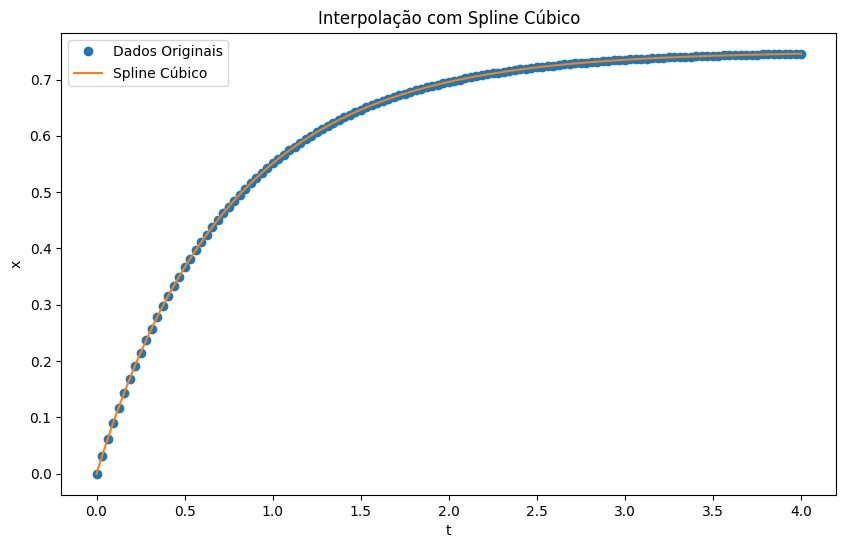

In [4]:
import numpy as np
import matplotlib.pyplot as plt


n = len(x) - 1  # Número de splines
h = x[1] - x[0]  # Intervalo uniforme

A = np.zeros((n + 1, n + 1))
b = np.zeros(n + 1)

A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i - 1] = h
    A[i, i] = 4 * h
    A[i, i + 1] = h
    b[i] = 3 * ((y[i + 1] - y[i]) / h - (y[i] - y[i - 1]) / h)

c = np.linalg.solve(A, b)

a = y[:-1]
b = np.zeros(n)
d = np.zeros(n)
for i in range(n):
    b[i] = (y[i + 1] - y[i]) / h - h * (2 * c[i] + c[i + 1]) / 3
    d[i] = (c[i + 1] - c[i]) / (3 * h)

def evaluate_spline(x_val):
    # Encontrar o intervalo que contém x_val
    if x_val < x[0] or x_val > x[-1]:
        return None  # x_val fora dos limites
    for i in range(n):
        if x[i] <= x_val <= x[i + 1]:
            delta = x_val - x[i]
            return a[i] + b[i] * delta + c[i] * delta**2 + d[i] * delta**3


x_vals = np.linspace(x[0], x[-1], 100)
y_vals = np.array([evaluate_spline(xi) for xi in x_vals])

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Dados Originais')
plt.plot(x_vals, y_vals, '-', label='Spline Cúbico')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Interpolação com Spline Cúbico')
plt.legend()
plt.show()